In [1]:
from torch.utils import data

In [7]:
import os
from PIL import Image


class CocoDetection(data.Dataset):
    """`MS Coco Detection <http://mscoco.org/dataset/#detections-challenge2016>`_ Dataset.


    Args:
        root (string): Root directory where images are downloaded to.
        annFile (string): Path to json annotation file.
        transform (callable, optional): A function/transform that  takes in an PIL image
            and returns a transformed version. E.g, ``transforms.ToTensor``
        target_transform (callable, optional): A function/transform that takes in the
            target and transforms it.
    """


    def __init__(self, root, annFile, transform=None, target_transform=None):
        from pycocotools.coco import COCO
        self.root = root
        self.coco = COCO(annFile)
        self.ids = list(self.coco.imgs.keys())
        self.transform = transform
        self.target_transform = target_transform


    def __getitem__(self, index):
        """
        Args:
            index (int): Index


        Returns:
            tuple: Tuple (image, target). target is the object returned by ``coco.loadAnns``.
        """
        coco = self.coco
        img_id = self.ids[index]
        ann_ids = coco.getAnnIds(imgIds=img_id)
        target = coco.loadAnns(ann_ids)


        path = coco.loadImgs(img_id)[0]['file_name']


        img = Image.open(os.path.join(self.root, path)).convert('RGB')
        if self.transform is not None:
            img = self.transform(img)


        if self.target_transform is not None:
            target = self.target_transform(target)


        return img, target




    def __len__(self):
        return len(self.ids)


    def __repr__(self):
        fmt_str = 'Dataset ' + self.__class__.__name__ + '\n'
        fmt_str += '    Number of datapoints: {}\n'.format(self.__len__())
        fmt_str += '    Root Location: {}\n'.format(self.root)
        tmp = '    Transforms (if any): '
        fmt_str += '{0}{1}\n'.format(tmp, self.transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
        tmp = '    Target Transforms (if any): '
        fmt_str += '{0}{1}'.format(tmp, self.target_transform.__repr__().replace('\n', '\n' + ' ' * len(tmp)))
        return fmt_str

In [3]:
my_dataset = CocoDetection("./Data/COCO/val2017","./Data/COCO/annotations/captions_val2017.json")

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!


In [4]:
my_dataset[0]

(<PIL.Image.Image image mode=RGB size=640x427>,
 [{'image_id': 397133,
   'id': 370509,
   'caption': 'A man is in a kitchen making pizzas.'},
  {'image_id': 397133,
   'id': 370584,
   'caption': 'Man in apron standing on front of oven with pans and bakeware'},
  {'image_id': 397133,
   'id': 372252,
   'caption': 'A baker is working in the kitchen rolling dough.'},
  {'image_id': 397133,
   'id': 372765,
   'caption': 'A person standing by a stove in a kitchen.'},
  {'image_id': 397133,
   'id': 375891,
   'caption': 'A table with pies being made and a person standing near a wall with pots and pans hanging on the wall.'}])

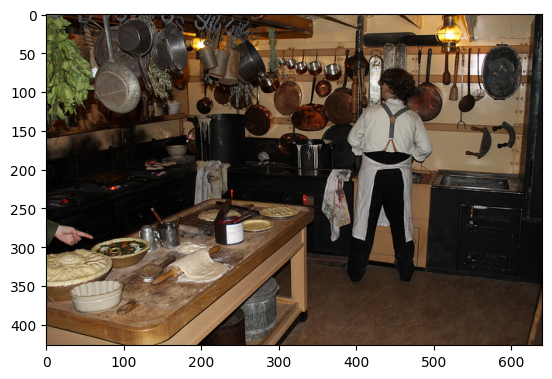

In [6]:
import matplotlib.pyplot as plt
plt.imshow(my_dataset[0][0])